# 

https://www.ree.es/es/apidatos

1. Extracción de Datos a Nivel Nacional:

    - Extraer datos de generación de energía renovable y no renovable a nivel nacional desde el 1 de enero de 2011 hasta el 31 de diciembre de 2022. La información debe ser recopilada a nivel mensual.

    - Transformar los datos para incluir una columna nueva que identifique si la energía es renovable o no renovable.

    - Almacenar los datos en un DataFrame con la siguiente estructura:


In [ ]:
import requests

import pandas as pd


In [14]:
rq1 = requests.get('https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2011-01-01T00:00&end_date=2012-12-31T23:59&time_trunc=month')
print(f'La respuesta ha sido {rq1.status_code}')

json1 = rq1.json()
json1.keys()

print(json1.keys())

La respuesta ha sido 200
dict_keys(['data', 'included'])


In [15]:
json1['data']


{'type': 'Generación por tecnología',
 'id': 'gen1',
 'attributes': {'title': 'Generación por tecnología',
  'last-update': '2019-06-12T15:32:24.000+02:00',
  'description': None},
 'meta': {'cache-control': {'cache': 'HIT',
   'expireAt': '2023-11-24T09:15:37'}}}

In [18]:
extraccion2 = json1['data']
extraccion2.keys()

print(extraccion2.keys())

dict_keys(['type', 'id', 'attributes', 'meta'])


In [ ]:
json1['included']

In [17]:
extraccion1 = json1['included'][0]
extraccion1.keys()

print(extraccion1.keys())

dict_keys(['type', 'id', 'groupId', 'attributes'])


In [32]:
for type in range(1,5):
    url = f'https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2011-01-01T00:00&end_date=2012-12-31T23:59&time_trunc=month={type}'

    print(url)

https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2011-01-01T00:00&end_date=2012-12-31T23:59&time_trunc=month=1
https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2011-01-01T00:00&end_date=2012-12-31T23:59&time_trunc=month=2
https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2011-01-01T00:00&end_date=2012-12-31T23:59&time_trunc=month=3
https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2011-01-01T00:00&end_date=2012-12-31T23:59&time_trunc=month=4


In [34]:
rq1 = requests.get('https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2011-01-01T00:00&end_date=2012-12-31T23:59&time_trunc=month=1').json()
rq2 = requests.get('https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2011-01-01T00:00&end_date=2012-12-31T23:59&time_trunc=month=2').json()

print(rq1)
print(rq2)

{'errors': [{'code': 411, 'status': '400', 'title': 'Widget bad request', 'detail': 'Petición incorrecta. No se ha especificado un time_trunc válido.'}]}
{'errors': [{'code': 411, 'status': '400', 'title': 'Widget bad request', 'detail': 'Petición incorrecta. No se ha especificado un time_trunc válido.'}]}


In [ ]:
diccionariodatos = {}


2. Extracción de Datos por Comunidad Autónoma:

    - Extraer datos de generación de energía renovable y no renovable por Comunidad Autónoma.

    - Utilizar el diccionario cod_comunidades para obtener los códigos de cada comunidad autónoma.

    - Transformar los datos para incluir una columna que especifique la comunidad autónoma y su identificador.

    - Almacenar los datos en un DataFrame con la siguiente estructura:

______
## BEAUTIFUL SOUP
______

In [1]:

from bs4 import BeautifulSoup
import requests

import pandas as pd

import re

In [2]:
url_coches = 'https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2'


req_coches = requests.get(url_coches)
req_coches.status_code

200

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8" class="next-head"/>
  <title class="next-head">
   Coches de segunda mano, ocasión y seminuevos | OcasionPlus
  </title>
  <meta class="next-head" content="4000 coches de ocasión y segunda mano con descuentos de hasta 6000€, la mejor relación calidad-precio garantizada." name="description"/>
  <meta class="next-head" content="noindex, follow, noarchive" name="robots"/>
  <meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/>
  <link class="next-head" href="/static/f
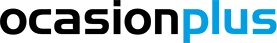

In [4]:
sopa_coches = BeautifulSoup(req_coches.content, 'html.parser')
print(sopa_coches.prettify())


In [5]:
listanombres = sopa_coches.find_all('h2', {'style': 'overflow-x:hidden'})
listanombres 

nombrecoches = [listanombres]
nombrecoches

[[<h2 style="overflow-x:hidden">Toyota C-HR 2.0 180H Advance (184 CV)</h2>,
  <h2 style="overflow-x:hidden">Fiat 500C Sport Cabrio (69 CV)</h2>,
  <h2 style="overflow-x:hidden">Ford Puma 1.0 EcoBoost (155CV) ST-Line X HEV Híbrido</h2>,
  <h2 style="overflow-x:hidden">Hyundai i20 1.0 TGDI 48V Klass (100 CV)</h2>,
  <h2 style="overflow-x:hidden">Renault Kangoo Combi Extrem M1-AF dCi(110 CV)</h2>,
  <h2 style="overflow-x:hidden">Peugeot 208 1.2 PureTech Allure (82 CV)</h2>,
  <h2 style="overflow-x:hidden">Volkswagen Touran Sport 1.4 TSI(150 CV) 7plz</h2>,
  <h2 style="overflow-x:hidden">Dacia Logan MCV Laureate dCi  (75 CV)</h2>,
  <h2 style="overflow-x:hidden">Ford Focus 2.0 TDCi S&amp;S Titanium (150 CV)</h2>,
  <h2 style="overflow-x:hidden">Volkswagen Touran 1.6 TDI SCR BMT 7 PLAZAS  (115 CV)</h2>,
  <h2 style="overflow-x:hidden">Peugeot 208 PureTech Style (82 CV)</h2>,
  <h2 style="overflow-x:hidden">Fiat 500X 1.6 MultiJet Cross 4x2 (120 CV)</h2>,
  <h2 style="overflow-x:hidden">Fiat 

In [6]:
listapreciosrebajados = sopa_coches.find_all('span', {'class': 'jsx-2689423372 price'})

preciosrebajados = [listapreciosrebajados]
preciosrebajados

[[<span class="jsx-2689423372 price">22.636<!-- -->€</span>,
  <span class="jsx-2689423372 price">8.954<!-- -->€</span>,
  <span class="jsx-2689423372 price">19.772<!-- -->€</span>,
  <span class="jsx-2689423372 price">18.264<!-- -->€</span>,
  <span class="jsx-2689423372 price">13.545<!-- -->€</span>,
  <span class="jsx-2689423372 price">9.991<!-- -->€</span>,
  <span class="jsx-2689423372 price">24.090<!-- -->€</span>,
  <span class="jsx-2689423372 price">10.227<!-- -->€</span>,
  <span class="jsx-2689423372 price">14.364<!-- -->€</span>,
  <span class="jsx-2689423372 price">14.536<!-- -->€</span>,
  <span class="jsx-2689423372 price">9.363<!-- -->€</span>,
  <span class="jsx-2689423372 price">13.000<!-- -->€</span>,
  <span class="jsx-2689423372 price">15.000<!-- -->€</span>,
  <span class="jsx-2689423372 price">25.227<!-- -->€</span>,
  <span class="jsx-2689423372 price">14.091<!-- -->€</span>,
  <span class="jsx-2689423372 price">19.990<!-- -->€</span>,
  <span class="jsx-26894233

In [7]:
listapreciosoriginales = sopa_coches.find_all('span', {'class', 'jsx-2870186023 priceLast'})

preciosoriginales = [listapreciosoriginales]
preciosoriginales

[[<span class="jsx-2870186023 priceLast">24.900<!-- -->€</span>,
  <span class="jsx-2870186023 priceLast">9.850<!-- -->€</span>,
  <span class="jsx-2870186023 priceLast">21.750<!-- -->€</span>,
  <span class="jsx-2870186023 priceLast">20.090<!-- -->€</span>,
  <span class="jsx-2870186023 priceLast">14.900<!-- -->€</span>,
  <span class="jsx-2870186023 priceLast">10.990<!-- -->€</span>,
  <span class="jsx-2870186023 priceLast">26.500<!-- -->€</span>,
  <span class="jsx-2870186023 priceLast">11.250<!-- -->€</span>,
  <span class="jsx-2870186023 priceLast">15.800<!-- -->€</span>,
  <span class="jsx-2870186023 priceLast">15.990<!-- -->€</span>,
  <span class="jsx-2870186023 priceLast">10.300<!-- -->€</span>,
  <span class="jsx-2870186023 priceLast">14.300<!-- -->€</span>,
  <span class="jsx-2870186023 priceLast">16.500<!-- -->€</span>,
  <span class="jsx-2870186023 priceLast">27.750<!-- -->€</span>,
  <span class="jsx-2870186023 priceLast">15.500<!-- -->€</span>,
  <span class="jsx-2870186

In [ ]:
listakm = sopa_coches.find_all('span', {'class': 'jsx-3960002075 detail big'})

kilometros = [listakm]
kilometros